## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
from sklearn.datasets import fetch_california_housing

housing_df  = fetch_california_housing(as_frame=True).frame

## Analyzing the dataset

##### **Visualizing the dataset using a heatmap**

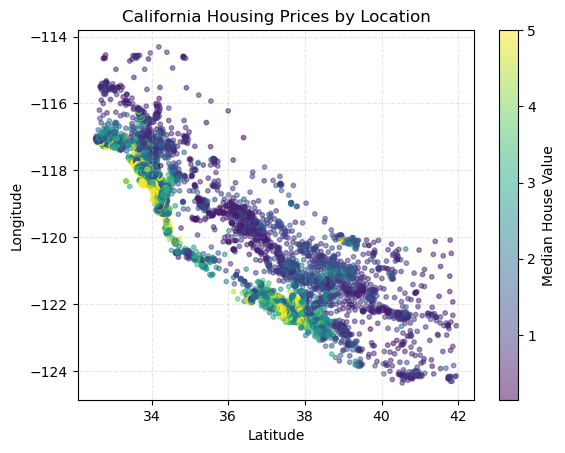

In [3]:
plt.scatter(housing_df["Latitude"], housing_df["Longitude"], c=housing_df["MedHouseVal"], cmap="viridis", alpha=0.5, s=10)
plt.colorbar(label="Median House Value")
plt.xlabel("Latitude")
plt.ylabel("Longitude") 
plt.title("California Housing Prices by Location")
plt.grid(1, alpha=0.3, linestyle='--')
plt.show()

In [4]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Remove the 'AveBedrms' column from the DataFrame, as #Bedrooms with #rooms is redundant
housing_df = housing_df.drop(columns=["AveBedrms"], axis=1)
# Filter out high income values

In [6]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
housing_df.info(), housing_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   Population   20640 non-null  float64
 4   AveOccup     20640 non-null  float64
 5   Latitude     20640 non-null  float64
 6   Longitude    20640 non-null  float64
 7   MedHouseVal  20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


(None,
 MedInc         0
 HouseAge       0
 AveRooms       0
 Population     0
 AveOccup       0
 Latitude       0
 Longitude      0
 MedHouseVal    0
 dtype: int64)

## Training the regression models

##### **Splitting the data into train and test set**

In [8]:
from sklearn.model_selection import train_test_split

X = housing_df.drop(columns=["MedHouseVal"])
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#### Linear Regression

##### **Fitting the data into Linear Regression model**

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg_pipe = make_pipeline(StandardScaler(), lin_reg)
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [10]:
lin_reg_pred = lin_reg_pipe.predict(X_test)
pd.DataFrame(lin_reg_pred) # Display the predictions

,0
0,0.736629
1,1.749118
2,2.473104
3,2.884945
4,2.713096
...,...
2059,2.030048
2060,1.808936
2061,3.029982
2062,1.691439


In [11]:
# let's see if there is some overfitting involved or not
# comparing the RMSE on train and test sets

rmse_train_linreg = rmse(y_train, lin_reg_pipe.predict(X_train))
rmse_test_linreg = rmse(y_test, lin_reg_pipe.predict(X_test))

print(f"Train RMSE= {rmse_train_linreg}\n Test RMSE= {rmse_test_linreg}")
## Booo! the RMSE is so similar :)

Train RMSE= 0.7310354995351023
 Test RMSE= 0.7533265678336849


##### **Visualizing the predictions by Linear Regression**

C:\Users\mayuk\AppData\Local\Temp\ipykernel_11404\1834829596.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


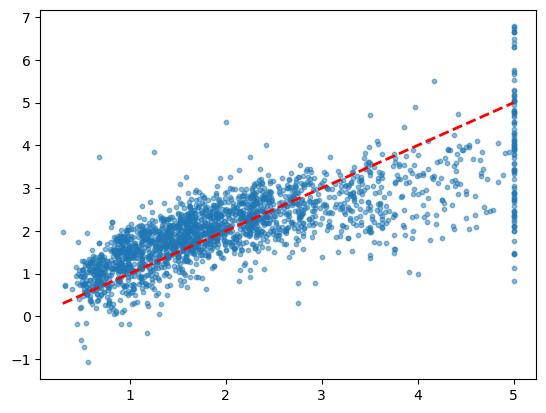

In [12]:
plt.scatter(y_test, lin_reg_pred ,alpha=0.5, s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
## It's almost linearly distributed

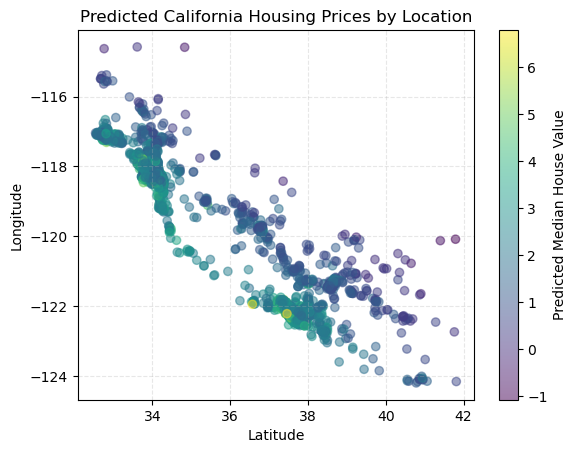

In [13]:
plt.scatter(X_test["Latitude"], X_test["Longitude"], c=lin_reg_pred, alpha=0.5)
plt.colorbar(label="Predicted Median House Value")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Predicted California Housing Prices by Location")
plt.grid(1, alpha=0.3, linestyle='--')
plt.show()

## it does look like California :)

#### Ridge Regression

##### **Fitting the data into Ridge Regression**

In [14]:
from sklearn.linear_model import Ridge

ridge_pipe = make_pipeline(StandardScaler(), Ridge())
ridge_pipe.fit(X_train, y_train)

ridge_pred = ridge_pipe.predict(X_test)
ridge_pred

array([0.73695046, 1.74894548, 2.47294297, ..., 3.02971596, 1.69136769,
       1.79958039])

In [15]:
rmse_train_ridge = rmse(y_train, ridge_pipe.predict(X_train))
rmse_test_ridge = rmse(y_test, ridge_pipe.predict(X_test))

print(f"Train RMSE Ridge = {rmse_train_ridge}\n Test RMSE Ridge = {rmse_test_linreg}")
print(f"If the RMSE of Ridge is lower than Linear Regression: {rmse_test_ridge< rmse_test_linreg}")

Train RMSE Ridge = 0.731035554735905
 Test RMSE Ridge = 0.7533265678336849
If the RMSE of Ridge is lower than Linear Regression: False


#### Predictions of the housing prices in California

In [16]:
# as linear regression fitted the data well, we can use it to predict the housing price

# Renaming the columns for clarity
y_test = y_test.rename('Actual Prices (Millions)')

lin_reg_pred = pd.DataFrame(lin_reg_pred, columns=['Predicted Prices (Millions)'])

# Reset indices to ensure proper alignment
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
lin_reg_pred = lin_reg_pred.reset_index(drop=True)

# Concatenate the DataFrames
pred_df = pd.concat([X_test, y_test, lin_reg_pred], axis=1)
pred_df.head()


,MedInc,HouseAge,AveRooms,Population,AveOccup,Latitude,Longitude,Actual Prices (Millions),Predicted Prices (Millions)
0,1.6812,25.0,4.192201,1392.0,3.877437,36.06,-119.01,0.47700,0.736629
1,2.5313,30.0,5.039384,1565.0,2.679795,35.14,-119.46,0.45800,1.749118
2,3.4801,52.0,3.977155,1310.0,1.360332,37.80,-122.44,5.00001,2.473104
3,5.7376,17.0,6.163636,1705.0,3.444444,34.28,-118.72,2.18600,2.884945
4,3.7250,34.0,5.492991,1063.0,2.483645,36.62,-121.93,2.78000,2.713096


C:\Users\mayuk\AppData\Local\Temp\ipykernel_11404\3608922201.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min_sc, max_sc], [min_sc, max_sc], 'k--', color="red", lw=2, label='Ideal')


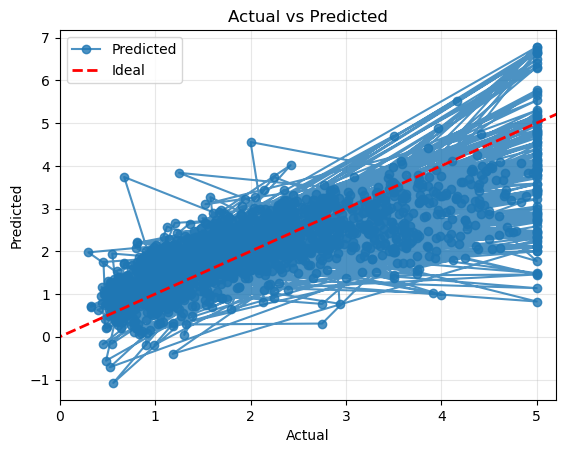

In [22]:
plt.plot(y_test, lin_reg_pred, 'o-', alpha=0.8, label='Predicted')

# Get the range that covers both actual and predicted values
max_sc = lin_reg_pred.max()
min_sc = lin_reg_pred.min()

plt.plot([min_sc, max_sc], [min_sc, max_sc], 'k--', color="red", lw=2, label='Ideal')
plt.xlim(0,5.2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
